Train shape: (2543146, 5)
Test shape: (412461, 2)
Metadata shape: (77833, 15)


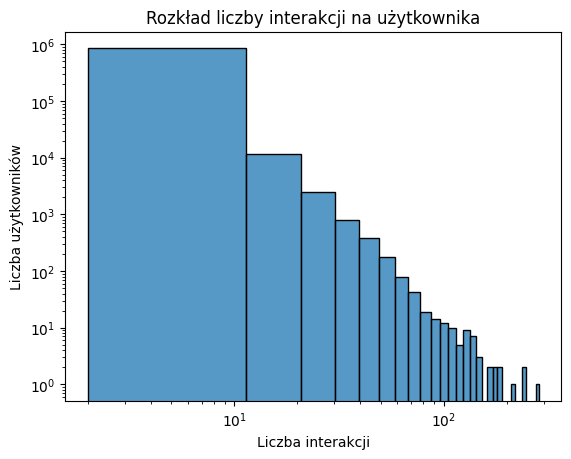

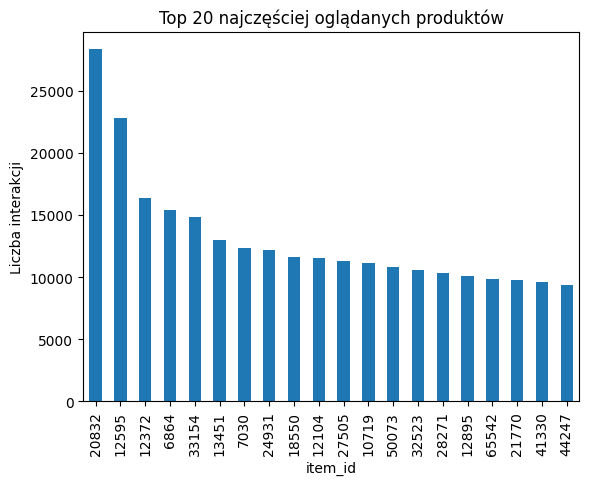

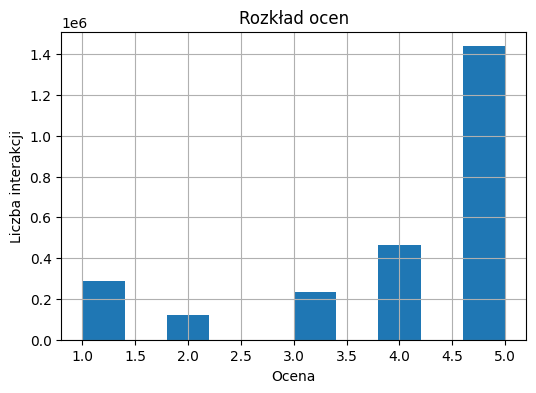

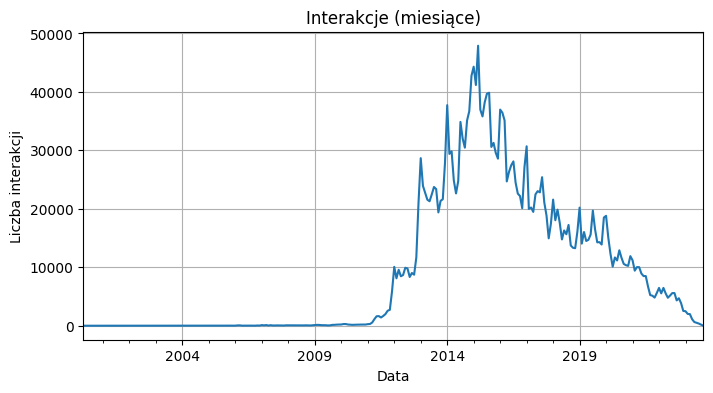

Procent braków w metadanych:
price            35.551758
rating_number     2.136626
store             2.462966
dtype: float64

--- Proces modelowania ---
1. Mapowanie ID użytkowników i produktów na indeksy numeryczne
2. Przygotowanie cech produktów, uwzględniając brakujące dane jako osobne cechy
3. Budowa macierzy interakcji LightFM
4. Trening modelu LightFM z loss='warp' i 256 komponentami
5. Predykcja na zbiorze testowym z fallbackiem popularnych produktów dla nowych użytkowników

Przykładowe rekordy metadanych:
  parent_asin main_category  \
0  B07WFSQXL5    All Beauty   
1  B08BV6F6BC    All Beauty   
2  B07Z818MLY    All Beauty   
3  B071DY8Z4B    All Beauty   
4  B0BTLTVR1X    All Beauty   

                                               title  average_rating  \
0  PPY Eyelash Growth Serum – Natural Ingredients...             3.9   
1  Wixar Natural Sea Moss Soap - (2 PACK) - Laven...             4.4   
2  7 Packs Deep Wave Crochet Hair 22 Inch Deep wa...             3.4   
3  BEW

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# Wczytanie danych
# ------------------------------
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
metadata = pd.read_csv("item_metadata_filtered.csv")
train['datetime'] = pd.to_datetime(train['timestamp'], unit='ms')

# ------------------------------
# Podstawowe statystyki
# ------------------------------
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Metadata shape:", metadata.shape)


# ------------------------------
# EDA - Analiza danych
# ------------------------------

# Rozkład liczby interakcji na użytkownika
user_interactions = train['user_id'].value_counts()
plt.figure()
sns.histplot(user_interactions, bins=30, kde=False)
plt.title("Rozkład liczby interakcji na użytkownika")
plt.xlabel("Liczba interakcji")
plt.ylabel("Liczba użytkowników")
plt.xscale('log')
plt.yscale('log')
plt.show()

# Rozkład popularności produktów
top_products = train['item_id'].value_counts().head(20)
plt.figure()
top_products.plot(kind='bar')
plt.title("Top 20 najczęściej oglądanych produktów")
plt.ylabel("Liczba interakcji")
plt.show()

plt.figure(figsize=(6, 4))
train['rating'].hist(bins=10)
plt.title("Rozkład ocen")
plt.xlabel("Ocena")
plt.ylabel("Liczba interakcji")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
train['datetime'].dt.to_period('M').value_counts().sort_index().plot()
plt.title("Interakcje (miesiące)")
plt.xlabel("Data")
plt.ylabel("Liczba interakcji")
plt.grid(True)
plt.show()

# Rozkład braków w metadanych
missing_summary = metadata[['price', 'rating_number', 'store']].isnull().mean() * 100
print("Procent braków w metadanych:")
print(missing_summary)

# ------------------------------
# Modelowanie - Skrót procesu
# ------------------------------

print("\n--- Proces modelowania ---")
print("1. Mapowanie ID użytkowników i produktów na indeksy numeryczne")
print("2. Przygotowanie cech produktów, uwzględniając brakujące dane jako osobne cechy")
print("3. Budowa macierzy interakcji LightFM")
print("4. Trening modelu LightFM z loss='warp' i 256 komponentami")
print("5. Predykcja na zbiorze testowym z fallbackiem popularnych produktów dla nowych użytkowników")

# ------------------------------
# Podgląd przykładowych metadanych
# ------------------------------
print("\nPrzykładowe rekordy metadanych:")
print(metadata.head())

## Wnioski

Wykresy:
- Widoczny jest popularity bias, dla dwóch produktów
- Większość użytkowników ma bardzo mało interakcji	Modele oparte na historii użytkownika będą mieć problem z cold-startem.
- Dominacja oceny 5 dla produktu może oznaczać implicit feedback (sygnał "lubię" lub "działa", nie skala jakości).
- Rozkład czasowy się kończy w 2024	Dane są symulowane lub zarchiwizowane z długiego okresu, więc temporalność jest możliwa.

Analiza:
- Duża ilość braków dotyczących ceny (ponad 35%). Może to oznaczać po prostu jej brak lub może ona wynosić 0.
- Test i train są odpowienio rozłożone.